In [1]:
from parameters import *
from functions import *

X0 = [2, 2]
PDEProb = 5.0556442459984824e-08

In [2]:
dt =T/200

R_in = np.sqrt(X0[0]**2 + X0[1]**2)
R_f = R

m = 7

R_list = np.linspace(R_in,R_f,m)

N_list = np.ones(m-1) * 3
N_list[0] = 14
N_list[1] = 10
N_list[2] = 7
N_list[3] = 5
N_list = N_list + 15

# Splitting method

Checking dimensionality of H, Ns and Y.
Radiuses: [2.828 2.524 2.219 1.914 1.609 1.305 1.   ]
Walks per stage: [29. 25. 22. 20. 18. 18.]
Timestep: 0.01


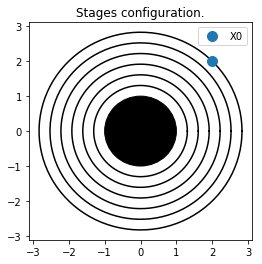


Splitting method starts...



Estimated variance: 7.777758053906937e-08
The estimated probability is: 1.1610356437942645e-07 (using MC)
Confidence interval: [ 1.1610356437942645e-07 +- 1.5244125666123935e-07 ]	with P = 95%

PDE result is:  5.0556442459984824e-08


In [3]:
H = np.zeros(R_list.shape[0]-1) #hits
Y = np.zeros(int(N_list[0]))
Y_SM, H_SM = SplittingMethod(X0, 0., 0.01, N_list, R_list, Y, H, 0, np.nan, verbose = 1, seed = SEED)
print('\n\n')
if H_SM is not np.nan:
    mean_SM, std = ComputeEstimatesSplittingMethod(Y_SM, N_list, PDEProb = PDEProb)

# Splitting method with balanced growth

Splitting method with balanced growth.

Radiuses: [2.828 2.524 2.219 1.914 1.609 1.305 1.   ]
Timestep: 0.01


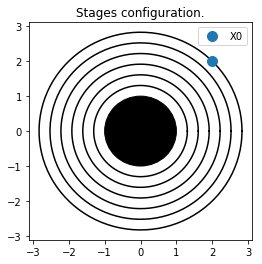


Pilot run with walks per stage:  [29. 25. 22. 20. 18. 18.]
Pilot run starts...
Pilot run terminated.
Pilot run results: 
	H = [ 3.  8.  8.  9. 10. 12.]
	p_i = [0.103 0.107 0.045 0.056 0.062 0.067] 
	N = [30 30 66 54 51 45]

Calling the splitting method.



Estimated variance: 5.843077130059766e-09
The estimated probability is: 6.724226041582613e-08 (using MC)
Confidence interval: [ 6.724226041582613e-08 +- 1.1452220733806804e-08 ]	with P = 95%

PDE result is:  5.0556442459984824e-08


In [4]:
Y_SM, H_SM, N_SM = SplittingMethodBalancedGrowth(X0, 0.01, R_list, N_list, T = 1, multiplier=1, verbose = 1, seed = SEED)
print('\n\n')
if H is not np.nan:
    mean_SM_BG, std = ComputeEstimatesSplittingMethod(Y_SM, N_SM, PDEProb)

# Error comparison

In [5]:
print('Splitting method (basic version) relative error:   ', np.abs(PDEProb - mean_SM)/PDEProb)
print('Splitting method (balanced growth) relative error: ', np.abs(PDEProb - mean_SM_BG)/PDEProb)

Splitting method (basic version) relative error:    1.2965137325736844
Splitting method (balanced growth) relative error:  0.3300433563743741
